# Custom Datasts using Pytorch

## importing PyTorch and setting up divice-agnosyic code

In [1]:
import torch
from torch import nn

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Mon Nov 10 12:28:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.08                 Driver Version: 581.08         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8              3W /   35W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1. Get data
Our dataset is a subset of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing).

Why do this?

When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If the image fodirlder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
#Download pizza, steak, sushi  data
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
    request =requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)
# unzip pizza, steak, sushi  data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    print("unzippping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exists... skipping download
unzippping pizza, steak, sushi data...


In [5]:
import os 
def walk_through_dir(dir_path):
   for dirpath,dirnames,filenames in os.walk(dir_path):
       print(f"these are {len(dirnames)} directories and {len(filenames)} image in '{dir_path}'.")

In [6]:
walk_through_dir(image_path)

these are 2 directories and 0 image in 'data\pizza_steak_sushi'.
these are 3 directories and 0 image in 'data\pizza_steak_sushi'.
these are 1 directories and 25 image in 'data\pizza_steak_sushi'.
these are 0 directories and 5 image in 'data\pizza_steak_sushi'.
these are 1 directories and 19 image in 'data\pizza_steak_sushi'.
these are 0 directories and 5 image in 'data\pizza_steak_sushi'.
these are 1 directories and 31 image in 'data\pizza_steak_sushi'.
these are 0 directories and 5 image in 'data\pizza_steak_sushi'.
these are 3 directories and 0 image in 'data\pizza_steak_sushi'.
these are 0 directories and 78 image in 'data\pizza_steak_sushi'.
these are 0 directories and 75 image in 'data\pizza_steak_sushi'.
these are 0 directories and 73 image in 'data\pizza_steak_sushi'.


In [7]:
# setup train and testing path
train_dir=image_path / "train"
test_dir=image_path / "test"

train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image

Let's write some code to:
1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image and print metada



data\pizza_steak_sushi\train\steak\2880035.jpg
steak
Random image path: data\pizza_steak_sushi\train\steak\2880035.jpg
Image classı steak
Image heights 512
Image width: 512


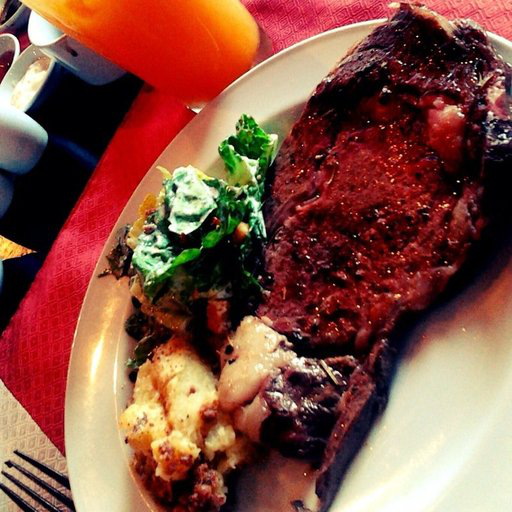

In [8]:
import random
from PIL import Image

#Set seed
#random.seed(42)

#1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

#2. pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

#3. get image class from path name (the image class is the name of the directory where the image is storge )
image_class = random_image_path.parent.stem
print(image_class)

#4. Open image
img =Image.open(random_image_path)

#5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image classı {image_class}")
print(f"Image heights {img.height}")
print(f"Image width: {img.width}")
img

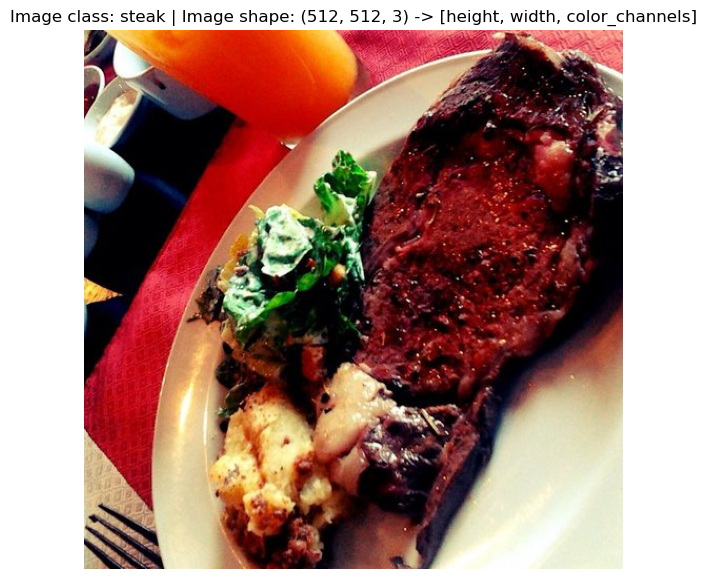

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#Turn the image into an array
img_as_array =np.asarray(img)

#Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis (False);

In [10]:
img_as_array

array([[[176, 184, 124],
        [166, 168, 105],
        [175, 167, 105],
        ...,
        [255, 175, 162],
        [255, 164, 152],
        [255, 160, 148]],

       [[174, 179, 121],
        [171, 171, 111],
        [177, 168, 109],
        ...,
        [255, 161, 148],
        [244, 146, 133],
        [239, 138, 126]],

       [[178, 181, 128],
        [176, 173, 118],
        [173, 161, 109],
        ...,
        [218, 125, 108],
        [221, 125, 109],
        [224, 127, 111]],

       ...,

       [[193, 184, 143],
        [188, 181, 139],
        [186, 179, 137],
        ...,
        [240, 245, 223],
        [240, 245, 223],
        [239, 244, 222]],

       [[196, 187, 146],
        [190, 181, 140],
        [185, 178, 136],
        ...,
        [238, 243, 221],
        [239, 244, 222],
        [240, 245, 223]],

       [[186, 177, 136],
        [183, 174, 131],
        [184, 177, 133],
        ...,
        [238, 243, 221],
        [239, 244, 222],
        [241, 246, 224]]

## 3. Transforming data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors (in our case, numerical representation of our images).
2. Turn it into a torch.utils.data. Dataset and subsequently a torch.utils.data.
DataLoader, we'll call these 'Dataset` and `DataLoader`.                   

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 3.1 Transforming data with 'torchvision.transforms'

In [12]:
# Write a transform for image
data_transform = transforms.Compose([
# Resize our images to 64x64
transforms.Resize(size=(64, 64)),
# Flip the images randomly on the horizontal
transforms.RandomHorizontalFlip(p=0.5),
# Turn the image into a torch.Tensor
transforms.ToTensor()
])

In [13]:
data_transform(img)

tensor([[[0.9529, 0.9608, 0.9647,  ..., 0.4235, 0.1255, 0.4549],
         [0.9294, 0.9451, 0.9490,  ..., 0.3647, 0.1725, 0.3647],
         [0.9490, 0.9529, 0.9333,  ..., 0.2078, 0.3608, 0.3529],
         ...,
         [0.9412, 0.9333, 0.9255,  ..., 0.5412, 0.3961, 0.4039],
         [0.9412, 0.9373, 0.9294,  ..., 0.2784, 0.4235, 0.7137],
         [0.9373, 0.9333, 0.9373,  ..., 0.3608, 0.7176, 0.7412]],

        [[0.5725, 0.5608, 0.5647,  ..., 0.3725, 0.1020, 0.3725],
         [0.4549, 0.4667, 0.5020,  ..., 0.3529, 0.1569, 0.2510],
         [0.4941, 0.4863, 0.4471,  ..., 0.2078, 0.3294, 0.2549],
         ...,
         [0.9569, 0.9529, 0.9451,  ..., 0.4353, 0.3255, 0.3686],
         [0.9569, 0.9569, 0.9529,  ..., 0.2196, 0.3529, 0.6667],
         [0.9569, 0.9569, 0.9569,  ..., 0.2667, 0.5961, 0.6902]],

        [[0.5176, 0.5176, 0.5176,  ..., 0.3255, 0.1529, 0.2980],
         [0.4549, 0.4667, 0.4863,  ..., 0.3647, 0.1804, 0.2314],
         [0.4784, 0.4784, 0.4549,  ..., 0.3098, 0.3294, 0.

In [14]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    """    
    Selects random images from a path of images and loads/transforms 
    them then plots the original vs the transformed version.
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)

            # Plot the target image
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)
            
            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0)  # (C,H,W) -> (H,W,C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)



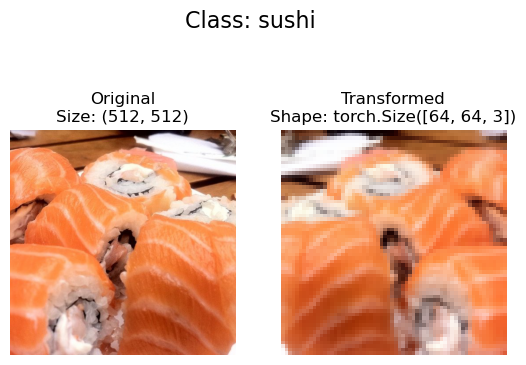

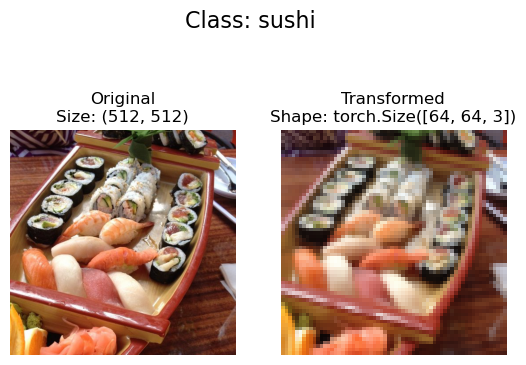

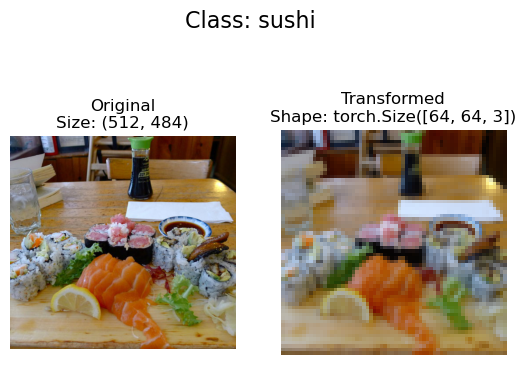

In [15]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        #seed=42
                       )

In [16]:
#Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data= datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                # a transform for the data
                                target_transform =None) # a transform for the label/target
test_data =datasets.ImageFolder (root=test_dir,
                                transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 226
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 90
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
# get class names
class_names= train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [18]:
class_dict= train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
# check the lengts of our data
len(train_data),len(test_data)

(226, 90)

In [20]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [21]:
img, label= next(iter(train_data))
img,label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

### 4.1 Turn loaded images into DataLoader`'s
A DataLoader is going to help us turn our 'Dataset's into iterables and we can customise the 'batch_size so our model can see batch_size images at a time.

In [22]:
import os 
os.cpu_count()

16

In [23]:
#Turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader (dataset=train_data,
                                batch_size=BATCH_SIZE,
                                num_workers=7,
                                shuffle=True)
test_dataloader = DataLoader (dataset=test_data,
                                batch_size=BATCH_SIZE,
                                num_workers=7,
                                shuffle=False)

In [24]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2869697e120>,
 <torch.utils.data.dataloader.DataLoader at 0x28696f925d0>)

In [25]:
len(train_dataloader),len(test_dataloader)

(226, 90)

In [26]:
img,label=next(iter(train_dataloader))

In [27]:
print(f"image shape: {img.shape}")
print(f"label shape: {label.shape}")

image shape: torch.Size([1, 3, 64, 64])
label shape: torch.Size([1])


## 5 Option 2: Loading Image Data with a Custom Dataset

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset
Pros:
* Can create a Dataset out of almost anything
* Not limited to PyTorch pre-built Dataset functions
Cons:
* Even though you could create Dataset out of almost anything, it doesn't mean it will work...
* Using a custom Dataset often results in us writing more code, which could be prone to errors or performance issues

In [28]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List